<a href="https://colab.research.google.com/github/molinacle/desafio_latam/blob/main/Desaf%C3%ADo_Latam_Desaf%C3%ADo_3_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DESAFÍO LATAM - DESAFÍO 3**
---

*   ALUMNO: SEBASTIÁN MOLINA
*   MODULO: MACHINE LEARNING
*   CARRERA: DATA SCIENCE

---
**CONTEXTO**

 - En la industria de las telecomunicaciones, la retención de clientes es un desafío clave para las empresas. La fuga de clientes, también conocida como churn, es un problema que puede tener un impacto significativo en los ingresos y la reputación de una empresa. Anticiparse a la fuga de clientes y tomar medidas preventivas para retenerlos se ha convertido en una prioridad estratégica. En este contexto, el objetivo de esta tarea es utilizar técnicas de machine learning para desarrollar un modelo que pueda predecir la probabilidad de fuga de clientes en una empresa de telecomunicaciones.
 - El objetivo principal de este proyecto es utilizar un enfoque basado en machine learning para construir un modelo predictivo de fuga de clientes. El modelo será capaz de clasificar a los clientes como "fugados" o "no fugados" en función de un conjunto de variables relevantes. El objetivo es proporcionar a la empresa de telecomunicaciones una herramienta eficaz para identificar a los clientes en riesgo de abandonar sus servicios, lo que permitirá tomar medidas proactivas para retenerlos.
 - Para lograr este objetivo, se utilizará un conjunto de datos históricos de la base de datos Telco-Customer-Churn.csv que contiene información detallada sobre los clientes como la duración de la suscripción, el uso de servicios, los tipos de servicios contratados, el historial de pagos y más. Estos datos servirán como base para entrenar y validar el modelo predictivo. Se emplearán diversas técnicas de preprocesamiento de datos, selección de características y entrenamiento de modelos de clasificación como árboles de decisión, Naive Bayes o regresión logística, con el fin de obtener el mejor rendimiento posible.
 - El resultado final será un modelo de clasificación preciso y confiable, capaz de predecir la probabilidad de fuga de clientes en la empresa de telecomunicaciones. Este modelo permitirá a la empresa identificar y priorizar a los clientes en riesgo, lo que a su vez facilitará la implementación de estrategias específicas de retención de clientes. Además, se espera que el proyecto proporcione una comprensión más profunda de los factores y las variables que influyen en la fuga de clientes en la industria de las telecomunicaciones.
 - En resumen, este proyecto tiene como objetivo principal aplicar técnicas de machine learning para desarrollar un modelo predictivo de fuga de clientes en la industria de las telecomunicaciones. El modelo resultante permitirá identificar a los clientes en riesgo de abandonar los servicios de la empresa y tomar acciones preventivas para retenerlos. A través de este enfoque, se busca mejorar la retención de clientes, aumentar la satisfacción y mejorar el rendimiento general de la empresa en un entorno altamente competitivo.

Responde las siguientes preguntas:

---
**1. Realizar un análisis exploratorio de los datos para comprender las características y la distribución de los datos.**

In [31]:
# Importación de Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc, roc_auc_score

In [2]:
# Cargar los datos
data = pd.read_excel('Telco-Customer-Churn.xlsx')

In [3]:
# Visualizar las primeras filas de los datos
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Obtener información sobre los tipos de datos y la cantidad de valores no nulos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Casi todas las variables son categóricas, solo 4 son numéricas. Además se ve que solo la columna "MonthlyCharges" contiene algunos valores nulos.

---



In [5]:
data['TotalCharges'].isnull().value_counts(normalize=True)

,proportion
TotalCharges,
False,0.998438
True,0.001562


Los nulos de la columna "TotalCharges" representan solo el 0,16% de los registros por lo que los eliminaremos en la etapa de preprocesamiento.

In [6]:
# Estadísticas descriptivas de las características numéricas
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


Destaca que solo el 16,21% de los clientes son adultos mayores. En base al tenure se puede inferir que hay algunos clientes nuevos dado que el valor mínimo es 0. Lo otro interesante es que la mediana y la media no distan bastante por lo que me parece que no hay una distribución normal para esta variable, de todas formas lo validaremos con gráficas.

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


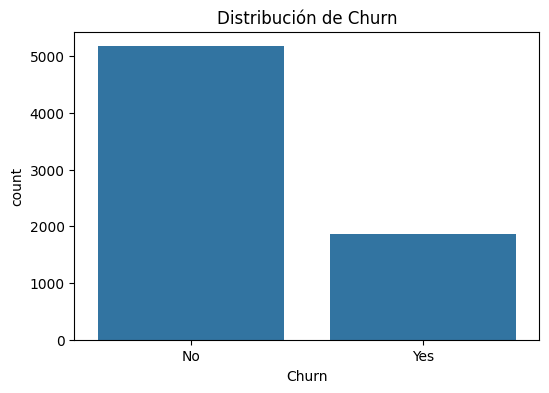

In [7]:
# Visualizar la distribución de la variable objetivo 'Churn'
print(data['Churn'].value_counts(normalize=True))

plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=data)
plt.title('Distribución de Churn')
plt.show()

Importante analizar el nivel de desbalance entre las clases, en este caso si bien existe un desbalance este no es tan grande y en promedio por cada cliente que se fuga hay 3 clientes que no se fugan.

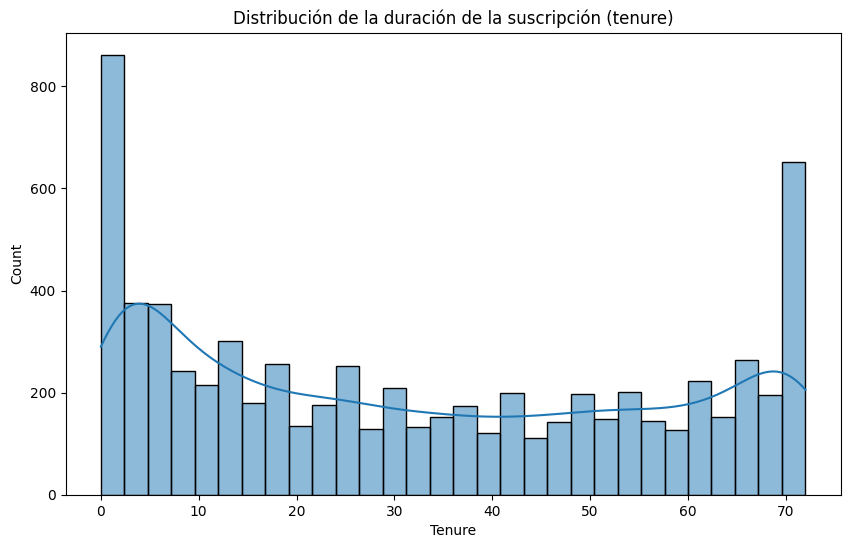

In [8]:
# Visualizar la distribución de la duración de la suscripción (tenure)
plt.figure(figsize=(10, 6))
sns.histplot(data['tenure'], bins=30, kde=True)
plt.title('Distribución de la duración de la suscripción (tenure)')
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.show()

La distribución del tenure es muy interesante dado que hay 2 picos de concentración de clientes en los primeros como en los mayores meses de vigencia. Me parece interesante observar esta distribución aperturada por clase de "Churn" para determinar si hay algún insight.

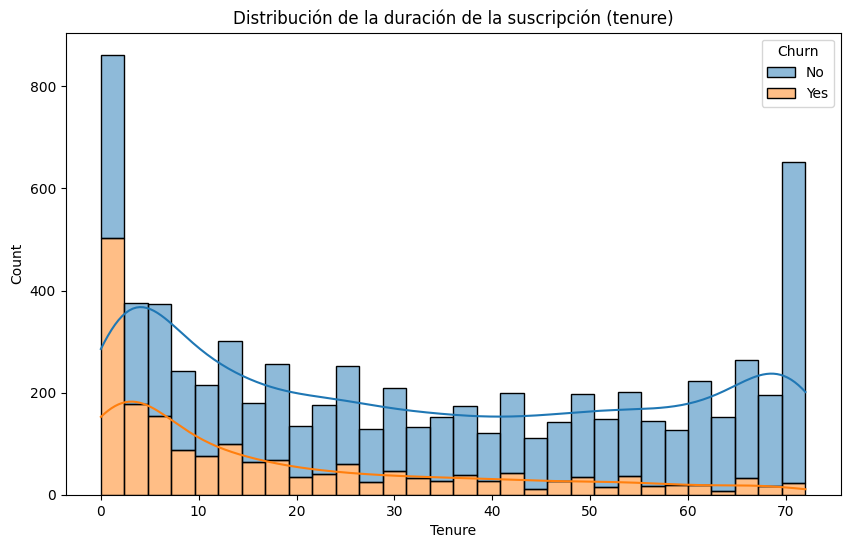

In [9]:
# Visualizar la distribución de la duración de la suscripción (tenure)
plt.figure(figsize=(10, 6))
sns.histplot(data, x='tenure', bins=30, kde=True, hue='Churn', multiple='stack')
plt.title('Distribución de la duración de la suscripción (tenure)')
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.show()

Efectivamente podemos visualizar que en este caso los clientes que se fugan tienen una distribución de tenure distinta de los clientes que no se fugan. Son justamente estas diferencias las que le permitirán al modelo discernir entre ambas clases.

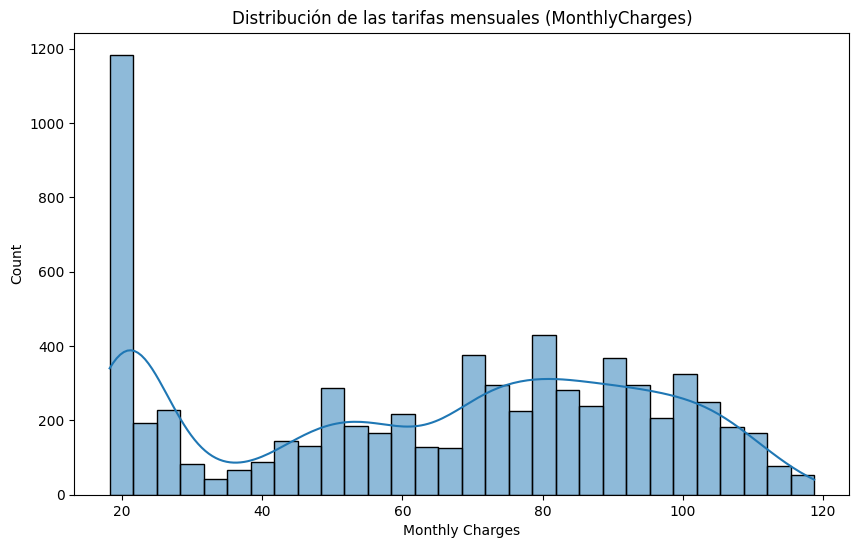

In [10]:
# Visualizar la distribución de las tarifas mensuales (MonthlyCharges)
plt.figure(figsize=(10, 6))
sns.histplot(data['MonthlyCharges'], bins=30, kde=True)
plt.title('Distribución de las tarifas mensuales (MonthlyCharges)')
plt.xlabel('Monthly Charges')
plt.ylabel('Count')
plt.show()

En esta gráfica se puede apreciar que hay muchos clientes que tienen un cargo mensual bajo y el resto de clientes, es decir, con cargos mayores de 40, se distribuyen de manera relativamente normal. Veamos ahora si podemos encontrar otro insight con respecto a esta variable.

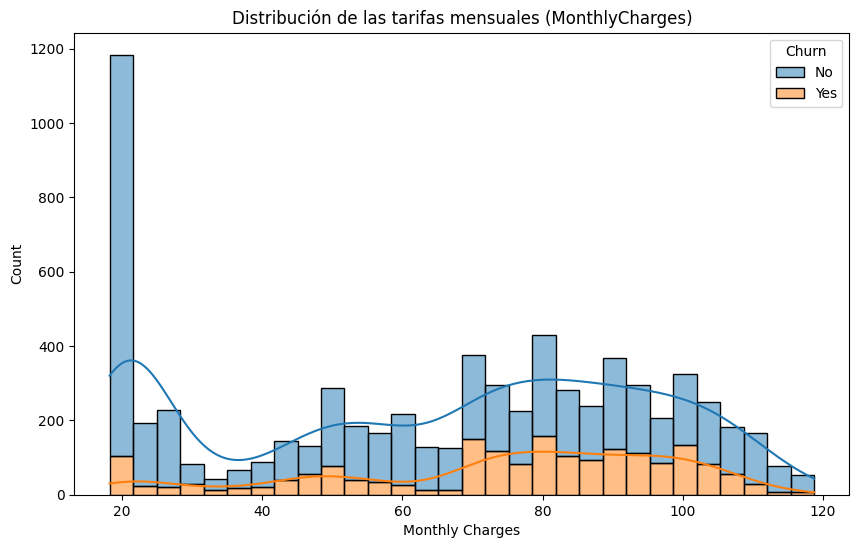

In [11]:
# Visualizar la distribución de las tarifas mensuales (MonthlyCharges)
plt.figure(figsize=(10, 6))
sns.histplot(data, x='MonthlyCharges', bins=30, kde=True, hue='Churn', multiple='stack')
plt.title('Distribución de las tarifas mensuales (MonthlyCharges)')
plt.xlabel('Monthly Charges')
plt.ylabel('Count')
plt.show()

Lo que puedo rescatar de esta gráfica es que la clase positiva se concentra en los valor del tercer cuarto de los Monthly Charges.

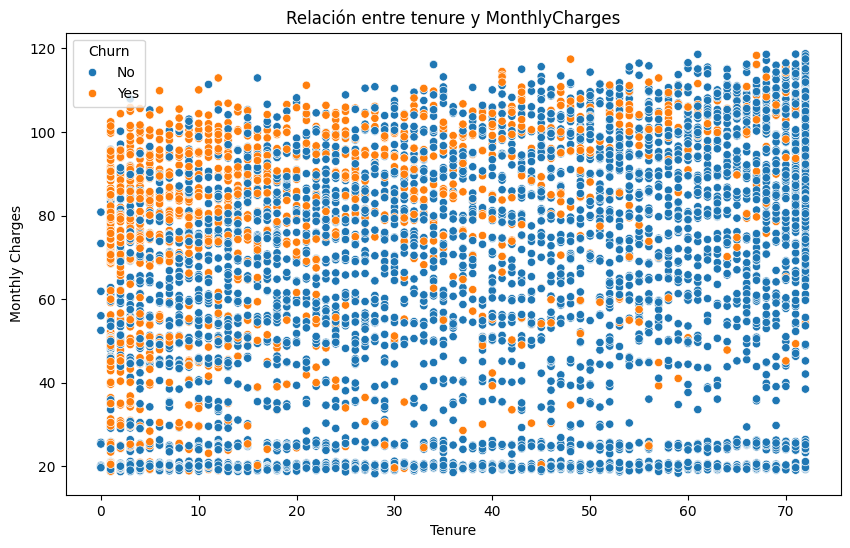

In [12]:
# Visualizar la relación entre la duración de la suscripción y las tarifas mensuales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tenure', y='MonthlyCharges', data=data, hue='Churn')
plt.title('Relación entre tenure y MonthlyCharges')
plt.xlabel('Tenure')
plt.ylabel('Monthly Charges')
plt.show()

Este scatter viene a confirmar lo que determinamos en las gráficas anteriores, es decir, la clase positiva se concentra en un tenure bajo y cargos mensuales mayores a la media.

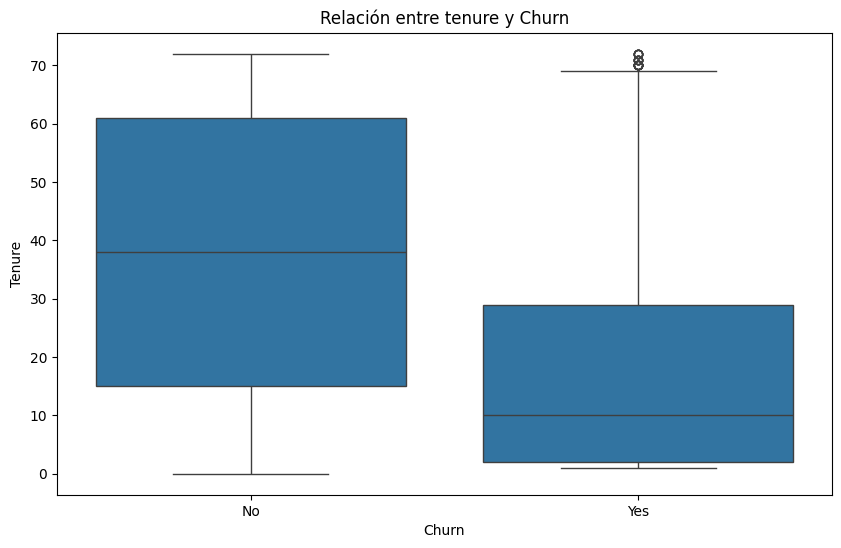

In [14]:
# Visualizar la relación entre la duración de la suscripción y el churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='tenure', data=data)
plt.title('Relación entre tenure y Churn')
plt.xlabel('Churn')
plt.ylabel('Tenure')
plt.show()

Este boxplot me parece interesante dado que confirma que es una variable crítica para que el modelo distinga entre ambas clases. Además en la clase positiva vemos que existen algunos valores outliers que vamos a eliminar en el preprocesamiento.

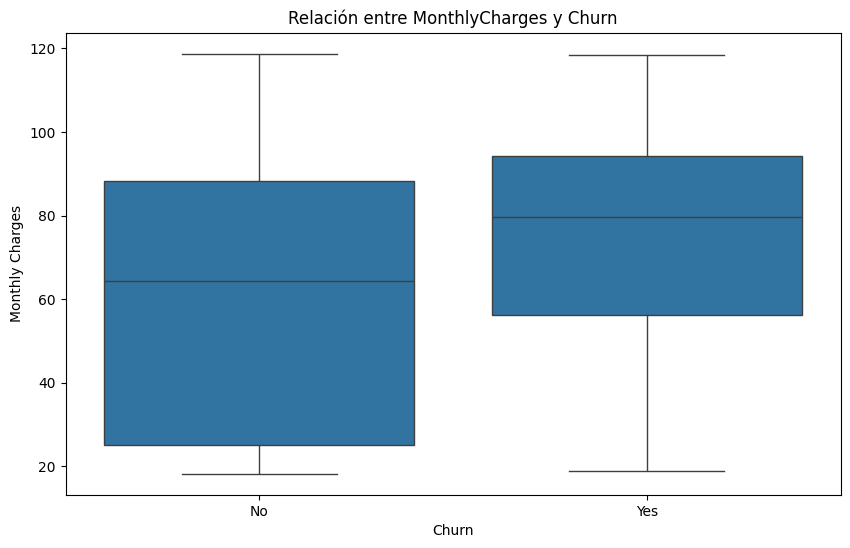

In [15]:
# Visualizar la relación entre las tarifas mensuales y el churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=data)
plt.title('Relación entre MonthlyCharges y Churn')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()

Seguimos confirmando que la clase positiva tiene, en promedio, mayores valores de cargos mensuales que los clientes que no se fugan.

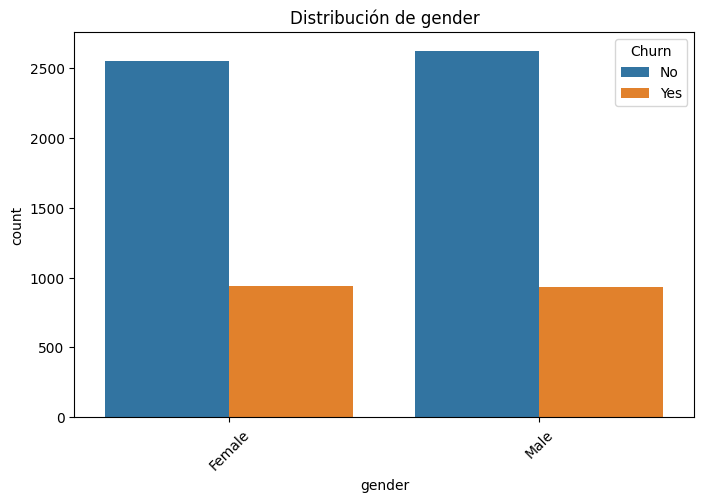

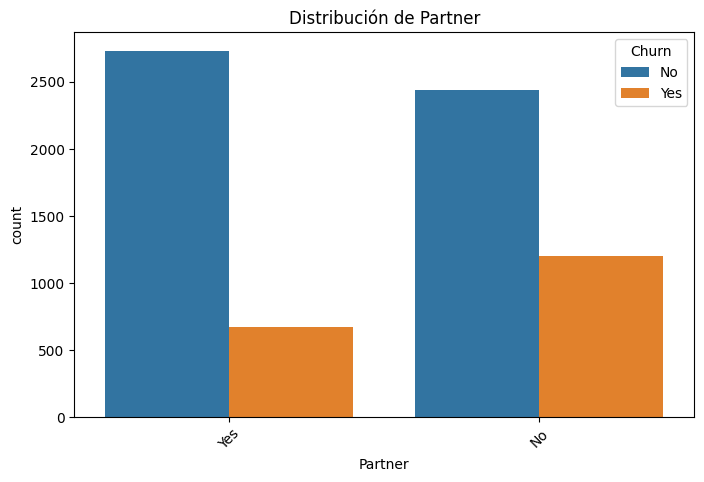

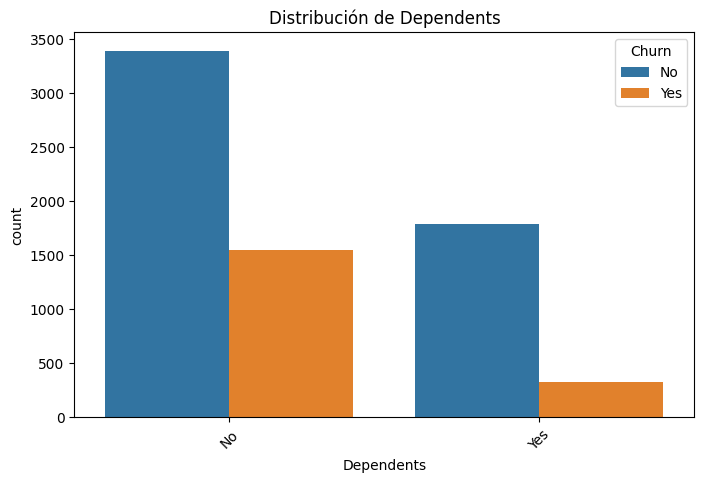

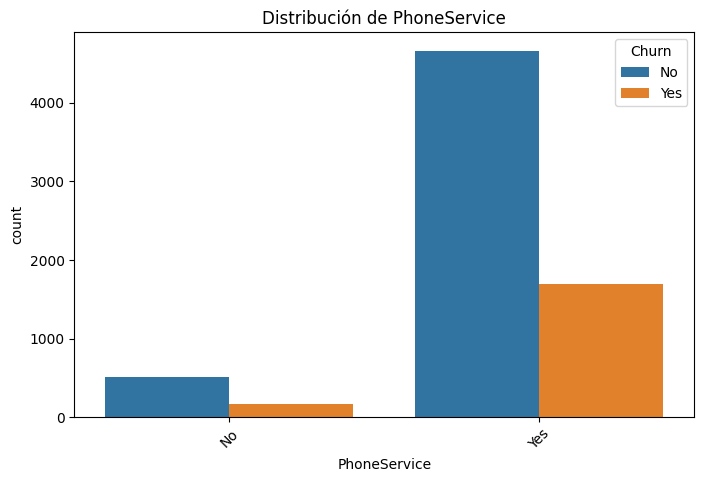

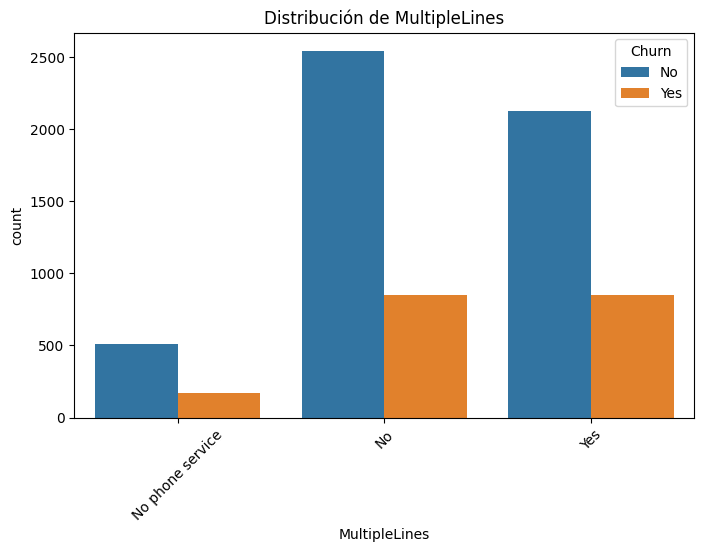

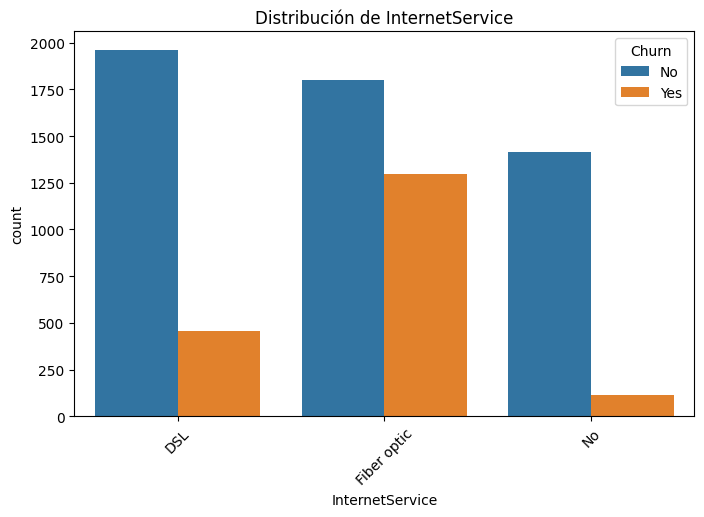

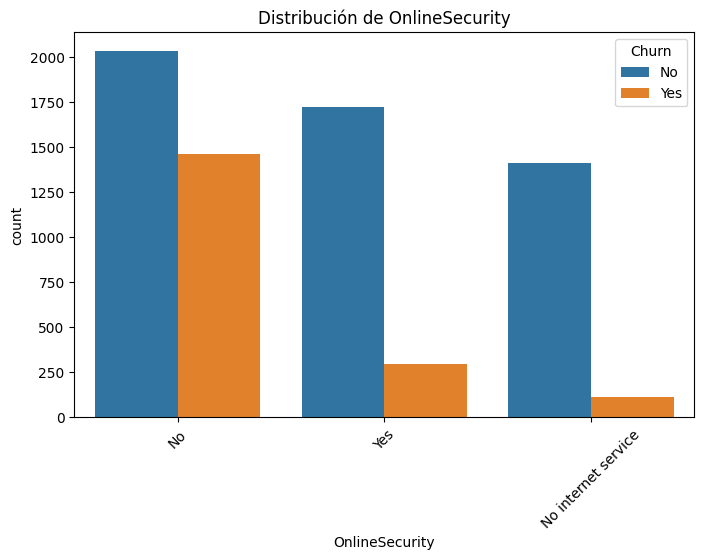

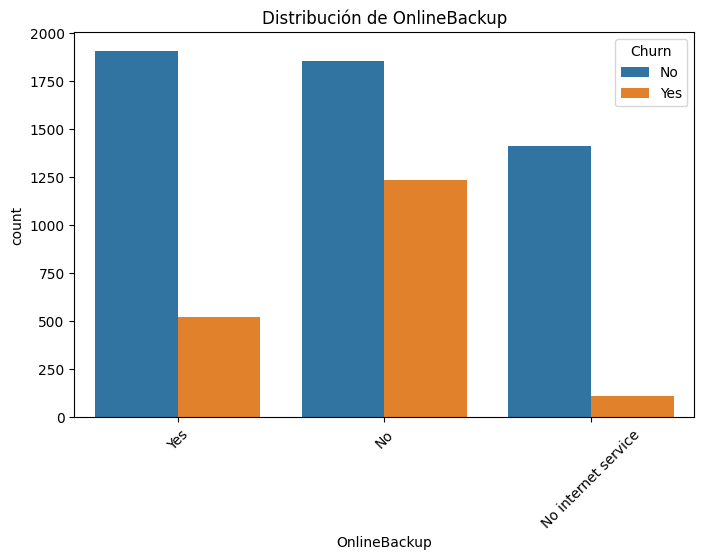

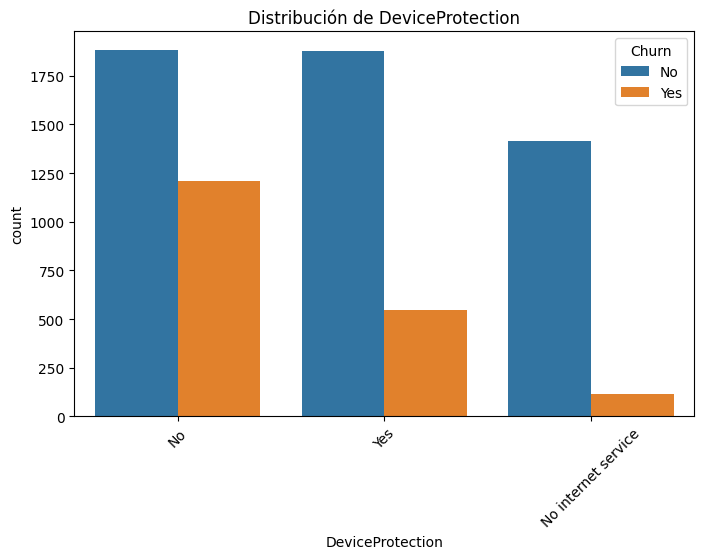

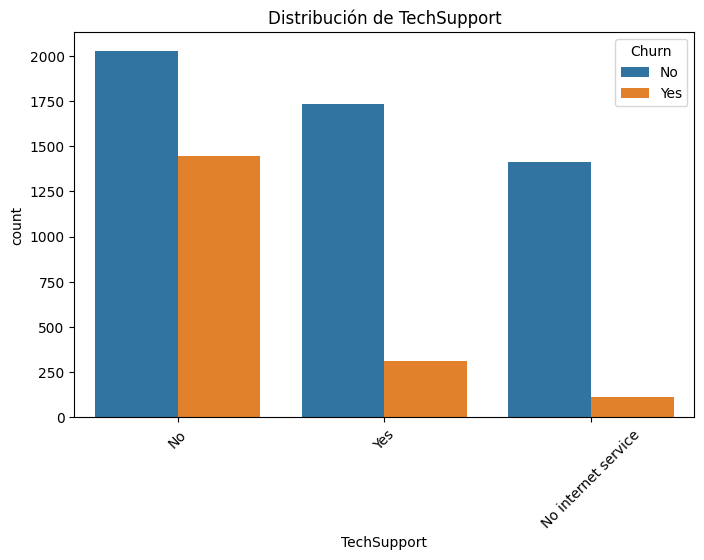

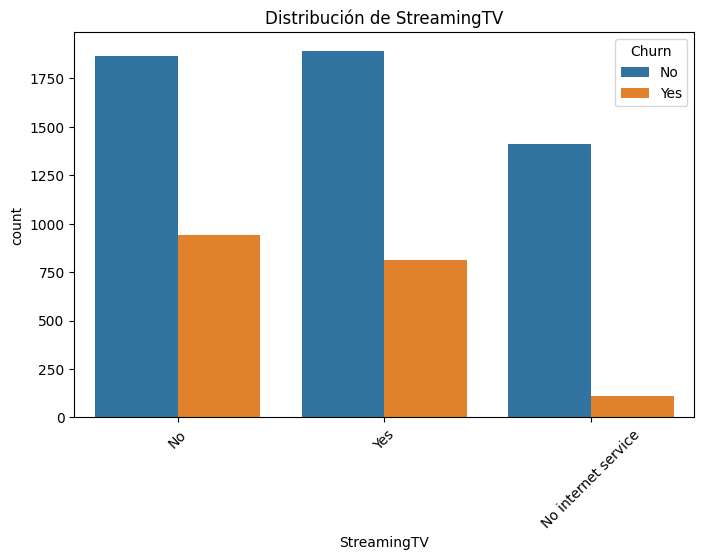

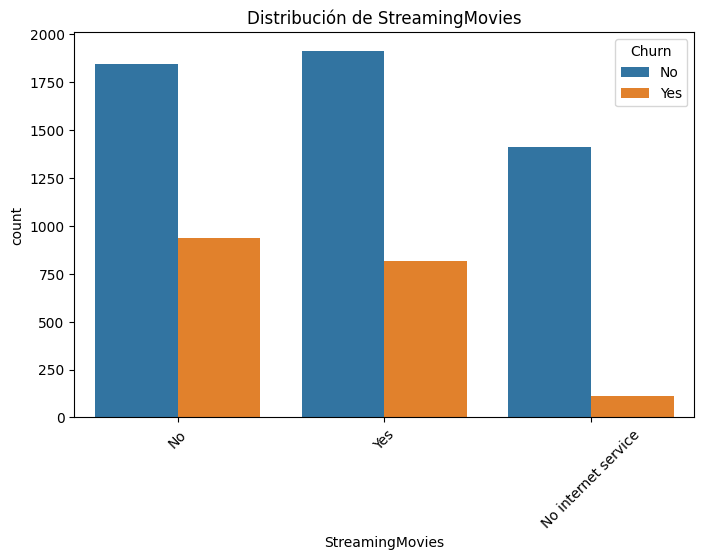

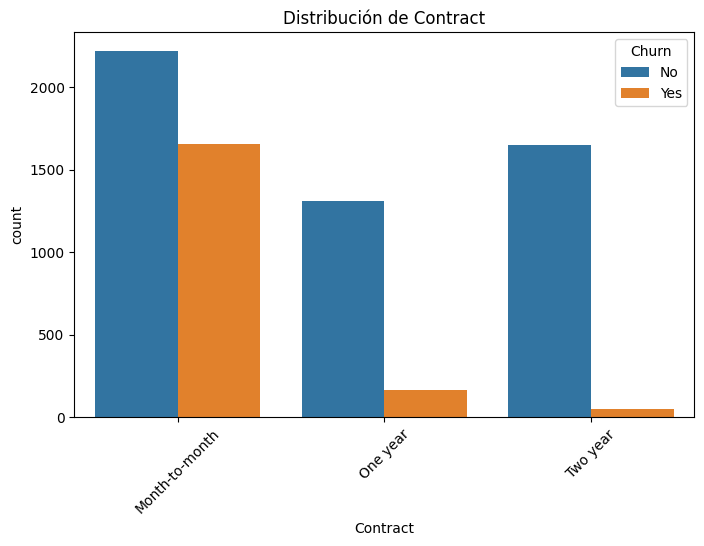

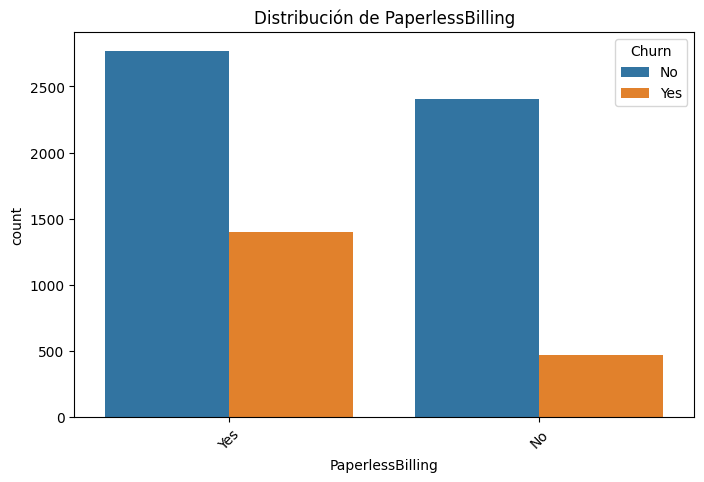

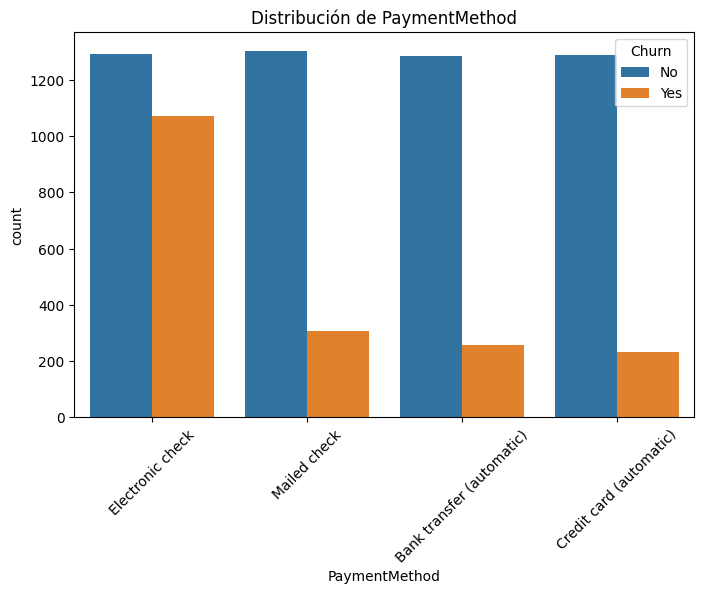

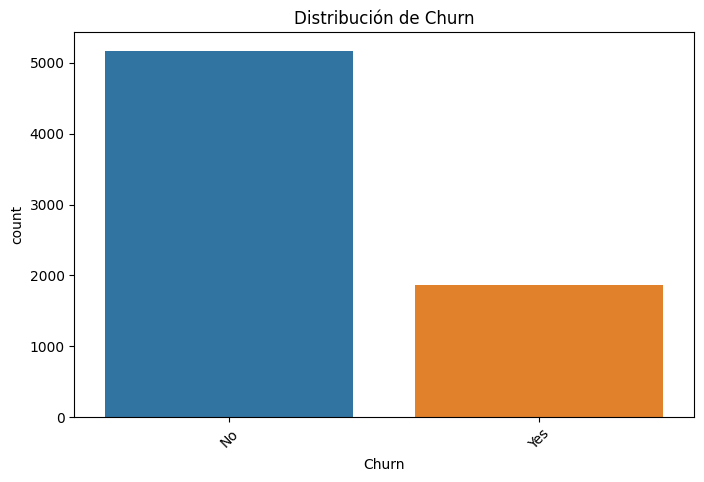

In [16]:
# Visualizar la distribución de las características categóricas
categorical_features = data.select_dtypes(include=['object']).columns.drop(['customerID'])
for feature in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=feature, data=data, hue='Churn')
    plt.title(f'Distribución de {feature}')
    plt.xticks(rotation=45)
    plt.show()

En esta serie de gráficas hay varios puntos que considero importante destacar:
- Cuando el cliente contrata fibra óptica existe una mayor proporción de clientes que se fuga que cuando contrata otro tipo de servicio de internet.
- Cuando el cliente NO contrata servicios adicionales de seguridad ('OnlineSecurity', 'OnlineBackup', 'DeviceProtection' o 'TechSupport') es más probable que se fugue.
- Cuando el contrato del cliente es de tipo mensual es más probable que el cliente se fugue. Esto tiene sentido dado que firmar un contrato por 1 o 2 años es una decisión que requiere mayor grado de análisis y consciencia, en cambio el contrato por pago mensual puede ser una decisión más impulsiva total después lo puedo renunciar.
- También un hallazgo importante es que los medios de pago que son del tipo automático tienen tasas de fuga menores que aquellos en donde el pago debe realizarse de forma manual por el cliente, sobretodo si el pago es electrónico y esto se debe realizar todos los meses.

---
**2. Preprocesar los datos, incluyendo la limpieza, la transformación y la normalización de las características según sea necesario.**

Ahora que hemos finalizado el análsis exploratorio de los datos comenzaremos con el preprocesamiento. Lo primero que haremos será eliminar los registros nulos que encontramos en la columna "TotalCharges".

In [17]:
# Manejo de valores faltantes
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

Ahora que ya no tenemos valores nulos, nos encargaremos de eliminar los valores atípicos que encontramos en la columna "Tenure" cuando el registro es de la clase positiva.

In [18]:
# Calcular los límites para los valores atípicos solo para Churn 'Yes'
Q1 = data[data['Churn'] == 'Yes']['tenure'].quantile(0.25)
Q3 = data[data['Churn'] == 'Yes']['tenure'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar los valores atípicos
clean_data = data[~((data['Churn'] == 'Yes') & (data['tenure'] > limite_superior))]

In [19]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7009 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7009 non-null   object 
 1   gender            7009 non-null   object 
 2   SeniorCitizen     7009 non-null   int64  
 3   Partner           7009 non-null   object 
 4   Dependents        7009 non-null   object 
 5   tenure            7009 non-null   int64  
 6   PhoneService      7009 non-null   object 
 7   MultipleLines     7009 non-null   object 
 8   InternetService   7009 non-null   object 
 9   OnlineSecurity    7009 non-null   object 
 10  OnlineBackup      7009 non-null   object 
 11  DeviceProtection  7009 non-null   object 
 12  TechSupport       7009 non-null   object 
 13  StreamingTV       7009 non-null   object 
 14  StreamingMovies   7009 non-null   object 
 15  Contract          7009 non-null   object 
 16  PaperlessBilling  7009 non-null   object 
 17  

Perfecto, ahora tendremos que encargarnos de la transformación de las variables categóricas y la normalización de las variables numéricas.

In [20]:
# Codificación de variables categóricas
categorical_columns = clean_data.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(clean_data, columns=categorical_columns.drop('customerID'), drop_first=True)

# Normalización de características
scaler = StandardScaler()

numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
df_encoded[numerical_columns] = scaler.fit_transform(df_encoded[numerical_columns])

In [21]:
df_encoded.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7009.000000,7.009000e+03,7.009000e+03,7.009000e+03
mean,0.162220,4.308470e-18,2.868934e-16,-1.092324e-16
std,0.368679,1.000071e+00,1.000071e+00,1.000071e+00
min,0.000000,-1.278168e+00,-1.545389e+00,-9.982149e-01
25%,0.000000,-9.514369e-01,-9.730624e-01,-8.293014e-01
50%,0.000000,-1.346093e-01,1.865641e-01,-3.894783e-01
75%,0.000000,9.272666e-01,8.354226e-01,6.662479e-01
max,1.000000,1.621570e+00,1.798728e+00,2.841845e+00


In [23]:
df_encoded.head()

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,7590-VHVEG,0,-1.278168,-1.159401,-0.993311,False,True,False,False,True,...,False,False,False,False,False,True,False,True,False,False
1,5575-GNVDE,0,0.069598,-0.257654,-0.168091,True,False,False,True,False,...,False,False,False,True,False,False,False,False,True,False
2,3668-QPYBK,0,-1.237327,-0.360806,-0.958566,True,False,False,True,False,...,False,False,False,False,False,True,False,False,True,True
3,7795-CFOCW,0,0.518853,-0.745130,-0.189724,True,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False
4,9237-HQITU,0,-1.237327,0.199874,-0.939263,False,False,False,True,False,...,False,False,False,False,False,True,False,True,False,True


He preprocesado los datos de la siguiente manera:

- Eliminación de valores nulos: Los valores nulos en la columna TotalCharges se eliminaron.
- Conversión de variables categóricas: Las variables categóricas se convirtieron a formato numérico utilizando codificación one-hot.
- Normalización de características numéricas: Las características numéricas (tenure, MonthlyCharges, TotalCharges) fueron normalizadas para mejorar el rendimiento del modelo.

Ahora, podemos proceder con la construcción y evaluación de modelos de machine learning para predecir la fuga de clientes.

---
**3. Dividir los datos en conjuntos de entrenamiento y prueba.**

In [24]:
# Preparación de los datos para el proceso de entrenamiento
X = df_encoded.drop(['customerID', 'Churn_Yes'], axis=1)
y = df_encoded['Churn_Yes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

---
**4. Entrenar al menos 3 algoritmos y optimizar sus hiperparametros.**

In [30]:
# Definir grids de hiperparámetros para cada modelo
logistic_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

tree_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

forest_param_grid = {
    'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instanciar modelos
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
tree_model = DecisionTreeClassifier(random_state=42)
forest_model = RandomForestClassifier(random_state=42)

# Instanciar GridSearchCV para cada modelo
logistic_search = GridSearchCV(logistic_model, logistic_param_grid, cv=5, scoring='f1', n_jobs=-1)
tree_search = GridSearchCV(tree_model, tree_param_grid, cv=5, scoring='f1', n_jobs=-1)
forest_search = GridSearchCV(forest_model, forest_param_grid, cv=5, scoring='f1', n_jobs=-1)

# Entrenar modelos
logistic_search.fit(X_train, y_train)
tree_search.fit(X_train, y_train)
forest_search.fit(X_train, y_train)

# Obtener los mejores modelos
best_logistic_model = logistic_search.best_estimator_
best_tree_model = tree_search.best_estimator_
best_forest_model = forest_search.best_estimator_

# Evaluar cada modelo
y_pred_logistic = best_logistic_model.predict(X_test)
y_pred_tree = best_tree_model.predict(X_test)
y_pred_forest = best_forest_model.predict(X_test)

# Calcular métricas de evaluación
logistic_report = classification_report(y_test, y_pred_logistic)
tree_report = classification_report(y_test, y_pred_tree)
forest_report = classification_report(y_test, y_pred_forest)

print("Best Logistic Regression Parameters:", logistic_search.best_params_)
print("Logistic Regression Report:\n", logistic_report)
print("Best Decision Tree Parameters:", tree_search.best_params_)
print("Decision Tree Report:\n", tree_report)
print("Best Random Forest Parameters:", forest_search.best_params_)
print("Random Forest Report:\n", forest_report)

Best Logistic Regression Parameters: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Logistic Regression Report:
               precision    recall  f1-score   support

       False       0.87      0.90      0.89      1586
        True       0.66      0.60      0.63       517

    accuracy                           0.83      2103
   macro avg       0.77      0.75      0.76      2103
weighted avg       0.82      0.83      0.82      2103

Best Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}
Decision Tree Report:
               precision    recall  f1-score   support

       False       0.85      0.85      0.85      1586
        True       0.54      0.53      0.53       517

    accuracy                           0.77      2103
   macro avg       0.69      0.69      0.69      2103
weighted avg       0.77      0.77      0.77      2103

Best Random Forest Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_

---
**5. Evaluar el rendimiento de los modelos utilizando métricas de evaluación pertinentes, como precisión, sensibilidad, valor F1, entre otras.**

Lo primero que haremos será comparar las matrices de confusión de los 3 modelos para comparar posteriormente las métricas correspondientes.

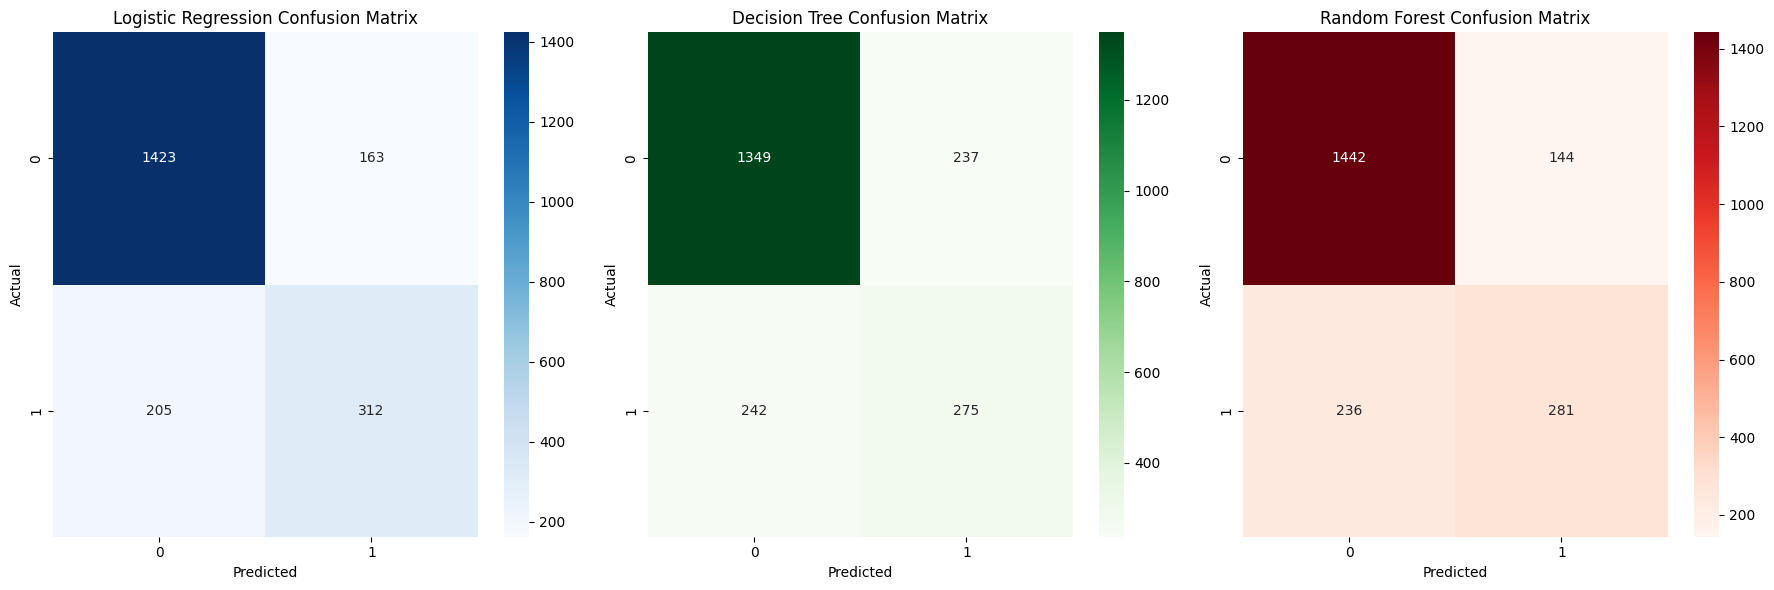

In [32]:
# Get confusion matrices
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
conf_matrix_forest = confusion_matrix(y_test, y_pred_forest)

# Plot confusion matrices
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

sns.heatmap(conf_matrix_logistic, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Logistic Regression Confusion Matrix')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

sns.heatmap(conf_matrix_tree, annot=True, fmt='d', cmap='Greens', ax=ax[1])
ax[1].set_title('Decision Tree Confusion Matrix')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

sns.heatmap(conf_matrix_forest, annot=True, fmt='d', cmap='Reds', ax=ax[2])
ax[2].set_title('Random Forest Confusion Matrix')
ax[2].set_xlabel('Predicted')
ax[2].set_ylabel('Actual')

plt.tight_layout()
plt.show()

Aquí tenemos las matrices de confusión para los tres modelos:

- Regresión Logística: Muestra un buen equilibrio entre verdaderos positivos y verdaderos negativos, con menos falsos negativos y falsos positivos.

- Árbol de Decisión: Presenta un mayor número de falsos negativos y falsos positivos en comparación con la regresión logística, lo que indica un desempeño menos consistente en identificar correctamente ambas clases.

- Random Forest: Muestra un desempeño más equilibrado, con menos falsos negativos y positivos en comparación con el árbol de decisión, pero aún más que la regresión logística.

Basado en estas matrices de confusión y las métricas de cada modelo y considerando el objetivo de maximizar la detección de clientes que se fugan, la Regresión Logística parece tener el mejor desempeño.